In [ ]:
# Copyright (c) Facebook, Inc. and its affiliates.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
#

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!

import seaborn as sns

import numpy as np
import torch
import pandas as pd

In [2]:
def gating_f(a=100):
    
    space = np.linspace(-1.0, 1.0, num=500)
    return space, np.power(a, space-1)

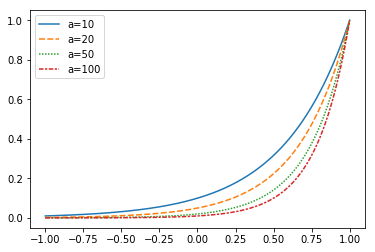

In [5]:
x, a10 = gating_f(10)
_, a20 = gating_f(20)
_, a50 = gating_f(50)
_, a100 = gating_f(100)


df = pd.DataFrame(np.c_[a10, a20, a50, a100], index=x)

sns.lineplot(data=df)
plt.legend(labels=[f'a={10}', f'a={20}', f'a={50}', f'a={100}',])
plt.savefig('activations.png', dpi=600)
plt.show()


In [19]:
def AND(x, y):
    return x*y

def OR(d1, d2, a=5):
    px1 = np.power((d1-2), -2*a) - np.power(2., -2*a)*(1-d1)
    px2 = np.power((d2-2), -2*a) - np.power(2., -2*a)*(1-d2)
    return  px1 + px2 - AND(px1, px2)

def XOR(x, y):
    return OR(x, y) - AND(x,y)

x = np.linspace(0, 1.0, num=1000)
y = np.linspace(0, 1.0, num=1000)

X, Y = np.meshgrid(x, y)

Z = AND(X, Y)
Z2 = OR(X, Y)
Z3 = XOR(X, Y)

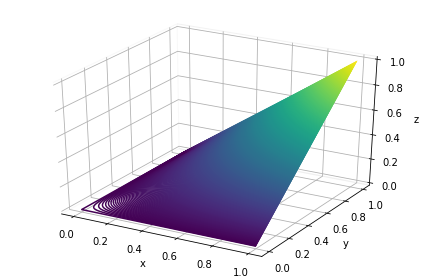

In [16]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z=Z, levels=500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.savefig('AND.png', dpi=600)


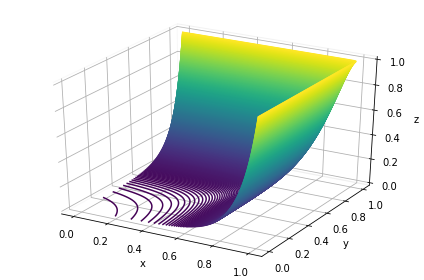

In [20]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z=Z2, levels=500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.tight_layout()
plt.savefig('OR.png', dpi=600)

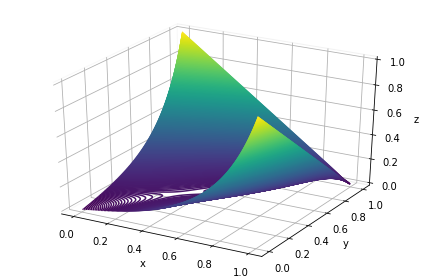

In [18]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z=Z3, levels=500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.tight_layout()
plt.savefig('XOR.png', dpi=600)